In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

# here we will have 398 training data, and 171 test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 87)

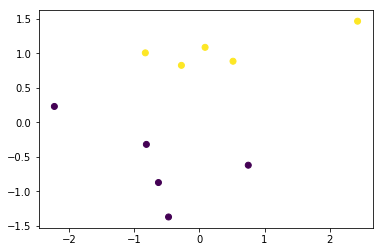

In [2]:
# to generate two classes which totally has 10-samples
# hence, we just need 10 Gaussian-kernels to represent the f-set
X, y = make_blobs(centers = [[-1,-1],[1,2]], n_samples = 10, n_features = 2, random_state = 87)
plt.scatter(X[:,0],X[:,1], c = y)
plt.show()

In [3]:
# define the Gaussain kernels for a given x and a given l:
def similarity(x,l,σ):
    norm_square = np.dot(x-l,x-l)
    return np.exp(-norm_square/(2*σ))

# generate the set of similarities for a given x:
def s(x,X,σ):
    f = [1]
    for i in range(len(X)):
        f += [similarity(x, X[i,:], σ)]
    return np.array(f)

# cost fun for y  = 1:
def cost1(θ, s):
    z = np.dot(θ, s)
    if z >= 1:
        return 0
    else:
        return -0.75*(z-1) # this slop is unnecessary equal to 0.75 (1 might be OK)

# cost fun for y = 0:
def cost0(θ, s):
    z = np.dot(θ, s)
    if z <= -1:
        return 0
    else:
        return -0.75*(z+1)

# Total cost fun for a given training sample:
def costJ(C, y, θ, s): # C = 1/λ, where λ is regurization parameter
    return C*(y*cost1(θ, s)+(1-y)*cost0(θ, s)) # we haven't included regurization term at here

# to decide which the slope of cost fun will be returned
def slope(y, θ, s):
    z = np.dot(θ, s)
    if (y == 1) & (z >= 1):
        return 0
    elif (y == 1) & (z < 1):
        return -0.75
    elif (y == 0) & (z <= -1):
        return 0
    elif (y == 0) & (z > -1):
        return 0.75

In [4]:
# random initial condition
# ϵ = 5
# θ = 2*ϵ*np.random.rand(len(X)+1)-ϵ
# the following set will give a better solution which is gotten by many-time tests
θ = np.array([ 0.32486221, -3.83437615,  1.55803285,  3.06977065, -1.06345911,  3.11811608, 
              -4.26287621, -4.77328774, -0.41106762, -3.67388877, -2.57440175])
print(θ)

[ 0.32486221 -3.83437615  1.55803285  3.06977065 -1.06345911  3.11811608
 -4.26287621 -4.77328774 -0.41106762 -3.67388877 -2.57440175]


converged at 396th step
J_ini = 1.35575; J_fin = 1.35538
final weight = [ 0.31736221 -0.62285235 -0.70446796  0.47808294 -0.5446462  -0.69854198
  0.43690453 -0.62339802  0.62246623  0.42898437  0.40271589]


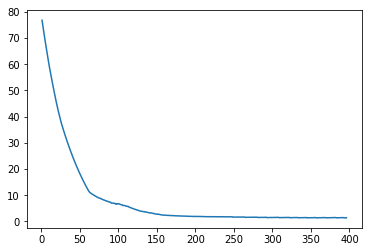

In [5]:
# generate similarities f0, f1, f2, .... fm
α = 0.01
C = 1.
σ = 2.
n_step = 1000
J_ini = 0
J = [] # to record cost of for each step
δJ = [] # δJi represents the derivative of J with respect to θi

for j in range(n_step):
    J_fin = 0
    δJ = []
    # sum over the cost fun for each training data
    for i in range(len(X)):
        s_p = s(X[i,:], X, σ) # the Gaussian-kernels set for a given data
        J_fin += costJ(C, y[i], θ, s_p) # the corresponding cost function
    J_fin += 0.5*np.sum((θ[1:])**2) # add regurization term
    
    # calculate the set of derivative δJk
    for k in range(len(X)+1):
        slope_sum = 0
        for p in range(len(X)): # for a given dJ/dθk, we need to sum over the contribution of all data
            s_pp = s(X[p,:],X,σ)
            slope_sum += C*slope(y[p], θ, s_pp)*s_pp[k]
        if k != 0: # for k not equal to 0, one should include the regurization term
            slope_sum += θ[k]
        δJ += [slope_sum]
        
    if (abs(J_fin - J_ini) < 1e-3):
        print('converged at {}th step'.format(j))
        print('J_ini = {:.5f}; J_fin = {:.5f}'.format(J_ini, J_fin))
        break
    else:
        θ += -α*np.array(δJ) # update the θ
        J_ini = J_fin
        J += [J_fin]
print('final weight = {}'.format(θ))
plt.plot(np.arange(1,len(J)+1), J)
plt.show()

In [6]:
# prediction fun
def predict(x, X, θ):
    z = np.dot(θ,s(x,X,σ))
    if z >= 0:
        return 1
    elif z < 0:
        return 0
    else:
        print('not sure')

In [7]:
y

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 1])

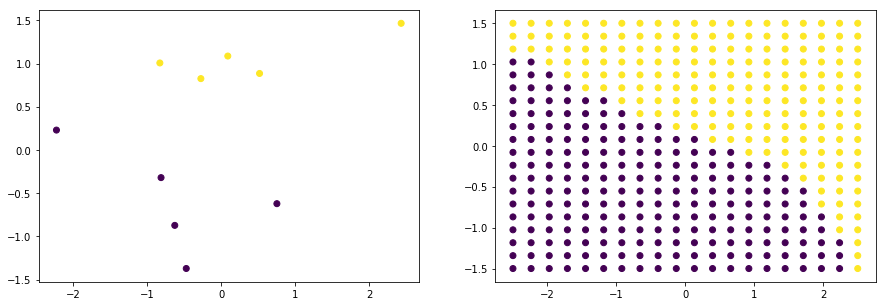

In [8]:
# let's see if the result is good or not
X_array, y_array = np.meshgrid(np.linspace(-2.5,2.5,20),np.linspace(-1.5,1.5,20))
array = np.c_[X_array.ravel(), y_array.ravel()]

# to predict all points on x1-x2 plane
predic = []
for q in range(len(array)):
    predic += [predict(array[q,:],X,θ)]
#print(predic)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1], c = y)
plt.subplot(1,2,2)
plt.scatter(array[:,0],array[:,1], c = predic)
plt.show()